랜덤 포레스트는 여러 개의 의사결정트리를 결합한 앙상블 모델입니다. 

이 모델은 트리 모델을 여러 개 사용하여 예측의 안정성을 높입니다.

In [ ]:
# 코드 설명:
# 정확도 평가:

# accuracy_score(y_test, rf_y_pred)를 사용하여 랜덤 포레스트 모델의 정확도를 평가합니다.
# 혼동 행렬 (Confusion Matrix):

# 혼동 행렬을 계산하여 실제 클래스와 예측된 클래스의 관계를 시각화합니다. 이를 위해 confusion_matrix 함수와 **seaborn.heatmap**을 사용하여 2D 히트맵을 생성합니다.
# 이 시각화는 True Positive, False Positive, True Negative, False Negative를 확인하는 데 유용합니다.
# 특성 중요도 (Feature Importance):

# 특성 중요도는 모델이 예측에 가장 중요한 특성이 무엇인지를 보여줍니다. 랜덤 포레스트 모델에서 feature_importances_ 속성을 사용하여 특성 중요도를 얻을 수 있습니다.
# 수평 바 차트로 시각화하여 각 특성이 예측에 얼마나 기여했는지 시각적으로 확인할 수 있습니다.

랜덤 포레스트 모델 정확도: 100.00%


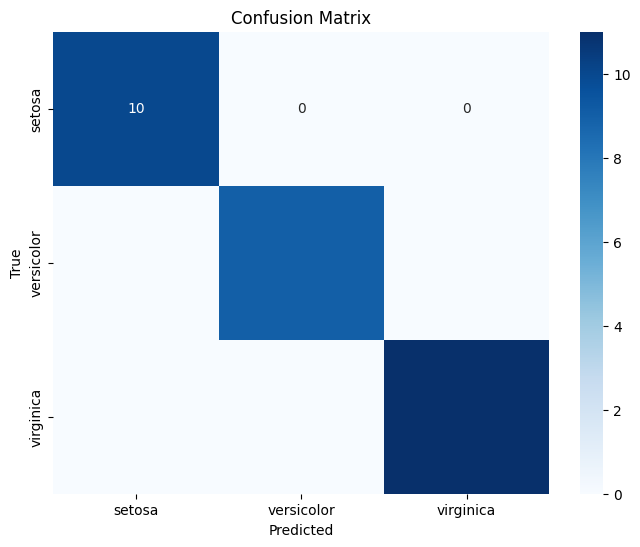

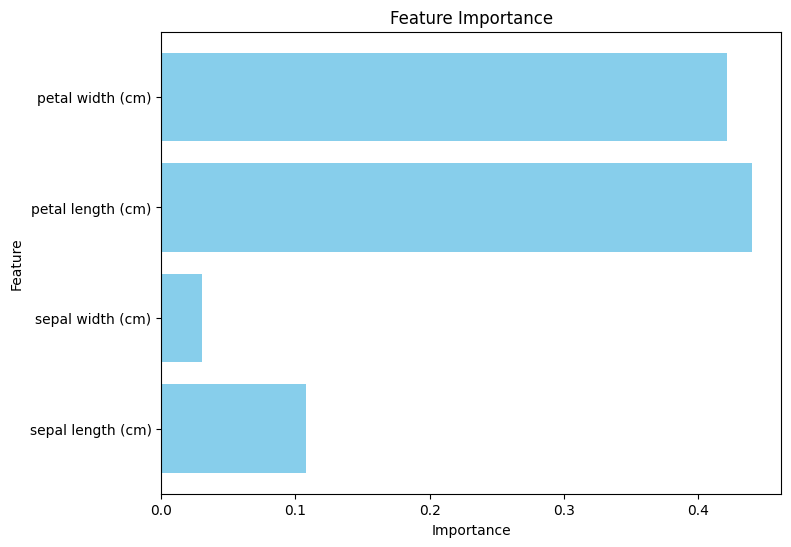

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# 예시 데이터셋: 붓꽃(Iris) 데이터셋
iris = load_iris()
X = iris.data  # 특성 (Features)
y = iris.target  # 레이블 (Labels)

# 훈련용 데이터와 테스트용 데이터로 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
rf_y_pred = rf_model.predict(X_test)

# 정확도 평가
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"랜덤 포레스트 모델 정확도: {rf_accuracy * 100:.2f}%")

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 특성 중요도 시각화
feature_importances = rf_model.feature_importances_
features = iris.feature_names

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# 출력 예시:
# 정확도: 랜덤 포레스트 모델의 정확도가 출력됩니다.
# 혼동 행렬: 예측된 값과 실제 값의 관계를 시각화한 혼동 행렬이 출력됩니다.
# 특성 중요도: 각 특성의 중요도를 보여주는 수평 바 차트가 출력됩니다.
# 추가 설명:
# 혼동 행렬은 분류 문제에서 모델이 어떻게 잘못 분류했는지, 즉 실제 클래스와 예측 클래스 사이의 차이를 보여주는 유용한 도구입니다.
# 특성 중요도는 모델이 예측할 때 어떤 특성이 중요한지 파악하는 데 유용하며, 데이터 분석에서 중요한 변수를 식별할 수 있습니다.